# Data Manipulation with pandas

In [2]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the four datasets
avocado = pd.read_csv("datasets/avocado.csv")
homelessness = pd.read_csv("datasets/homelessness.csv")
temperatures = pd.read_csv("datasets/temperatures.csv")
walmart = pd.read_csv("datasets/walmart.csv")

# Print the first DataFrame
avocado

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56
...,...,...,...,...,...,...
1009,2018-02-04,organic,2018,1.53,extra_large,1703.52
1010,2018-01-28,organic,2018,1.61,extra_large,1270.61
1011,2018-01-21,organic,2018,1.63,extra_large,1490.02
1012,2018-01-14,organic,2018,1.59,extra_large,1580.01


After running the cell above, you have created four pandas DataFrames: `avocado`, `homelessness`, `temperatures`, and `walmart`. 

1. Print the highest weekly sales for each `department` in the `walmart` DataFrame. Limit your results to the top five departments, in descending order. If you're stuck, try reviewing this [video](https://campus.datacamp.com/courses/data-manipulation-with-pandas/aggregating-dataframes?ex=1).
2. What was the total `nb_sold` of organic avocados in 2017 in the `avocado` DataFrame? If you're stuck, try reviewing this [video](https://campus.datacamp.com/courses/data-manipulation-with-pandas/slicing-and-indexing-dataframes?ex=6).
3. Create a bar plot of the total number of homeless people by region in the `homelessness` DataFrame. Order the bars in descending order. Bonus: create a horizontal bar chart. If you're stuck, try reviewing this [video](https://campus.datacamp.com/courses/data-manipulation-with-pandas/creating-and-visualizing-dataframes?ex=1).
4. Create a line plot with two lines representing the temperatures in Toronto and Rome. Make sure to properly label your plot. Bonus: add a legend for the two lines. If you're stuck, try reviewing this [video](https://campus.datacamp.com/courses/data-manipulation-with-pandas/creating-and-visualizing-dataframes?ex=1).

In [3]:
# 1. Print the highest weekly sales for each department
highest_sales_dep = walmart.groupby("department")[["weekly_sales"]].max()
highest_sales_dep_srt = highest_sales_dep.sort_values("weekly_sales", ascending=False)
print(highest_sales_dep_srt.head())

            weekly_sales
department              
92             293966.05
72             232558.51
95             213042.66
90             166263.81
91             162497.78


In [4]:
# 2. What was the total `nb_sold` of organic avocados in 2017?
avocado_ind = avocado.set_index("date").sort_index()
avocado_2017 = avocado_ind.loc["2017-01-01":"2017-12-31"]
avocado_2017_organic = avocado_2017[avocado_2017["type"] == "organic"]["nb_sold"].sum()
print(avocado_2017_organic)

23321281.07


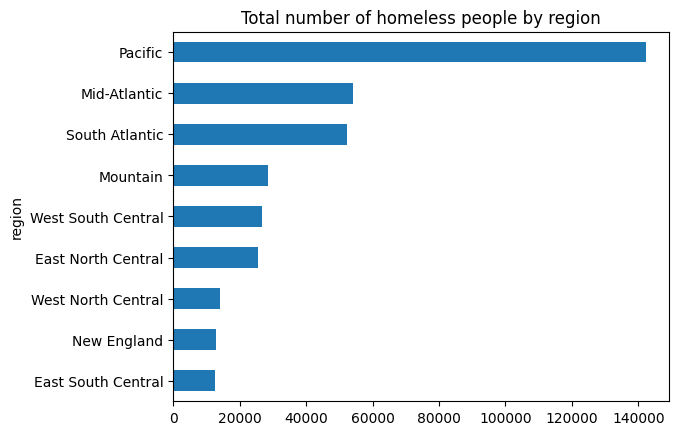

In [5]:
# 3. Create a bar plot of the number of homeless people by region
homeless_by_region = homelessness.groupby("region")["individuals"].sum()
homeless_by_region_srt = homeless_by_region.sort_values()
homeless_by_region_srt.plot(kind="barh", title="Total number of homeless people by region")
plt.show()

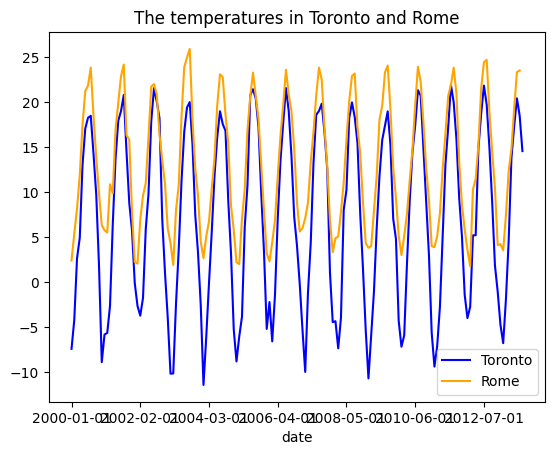

In [6]:
# 4. Create a line plot of temperatures in Toronto and Rome
toronto = temperatures[temperatures["city"] == "Toronto"]
rome = temperatures[temperatures["city"] == "Rome"]

toronto_mean = toronto.groupby("date")["avg_temp_c"].mean()
rome_mean = rome.groupby("date")["avg_temp_c"].mean()

toronto_mean.plot(kind="line", color="blue")
rome_mean.plot(kind="line", color="orange")

plt.legend(["Toronto", "Rome"])
plt.title("The temperatures in Toronto and Rome")
plt.xlabel = "Date"
plt.ylabel = "Average temperature"

plt.show()